### Project Overview
- Your goal for this project is to create an Artificial Neural Network that will aim to predict the AAA US Corporate Index Effective Yield using the equity markets ("^GSPC", "^DJI", "^IXIC",  "^RUT") as your features. 
- 20 year time frame beginning 2000
- What realationship did you find between the equity market and the AAA US Corporate Index Effective Yield?
- How accurate is your model in predicting the AAA US Corporate Index Effective Yield?
- How could you improve this model if possible. 

## Data/Acknowledgement
- AAA US Corporate Index Effective Yield will be downloaded from the https://fred.stlouisfed.org/series/BAMLC0A1CAAAEY
- Equity data will be collected from the Pandas_Datareader library with a 20 year time frame

### Project Inspiration
- The AAA US Corporate Index Effective Yield is inversely coorelatied to the Equity markets about 50% over a 20 year span. This would present the possibility that there is some predictive capability in these markets. Though we do not know exactly were we can use a Artificial Neural Network to find out if our theory is correct.

### Project Results 
- Equity Markets have a 94% explained variance score for relative to the AAA US Corporate Index Effective Yield
- We can conclude that we can make accurate prediciton of the value of AAA US Corporate Index Effective Yield based on the equity markets. 
- We may also conclude that we can do inverse  where the AAA US Corporate Index Effective Yield could predice the value of the Equity Markets

In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data
- will need to convert the  AAA US Corporate Index Effective Yield values to numeric, but first remove the . values in the data set

In [18]:
aaa_yield = pd.DataFrame(pd.read_csv("resources/aaayield.csv", index_col="DATE", parse_dates = True))

In [19]:
aaa_yield.columns = ["AAA"]

In [23]:
aaa_yield.replace(["."], np.nan, inplace=True)

In [27]:
aaa_yield = pd.to_numeric(aaa_yield["AAA"])

In [29]:
aaa_yield  = pd.DataFrame(aaa_yield)

### Visualization
- the AAA US Corporate Index Effective Yield has fallen below 2% only two times since 1996
- appears the second time is during our current crisis (Covid-19) and 2012

In [37]:
aaa_yield[aaa_yield["AAA"] < 2]

,AAA
DATE,
2012-01-30,1.98
2012-01-31,1.97
2012-02-01,1.99
2012-02-02,1.99
2012-02-10,1.99
...,...
2020-07-01,1.63
2020-07-02,1.60
2020-07-03,1.60


Text(0.5, 1.0, 'AAA US Corporate Index Effective Yield')

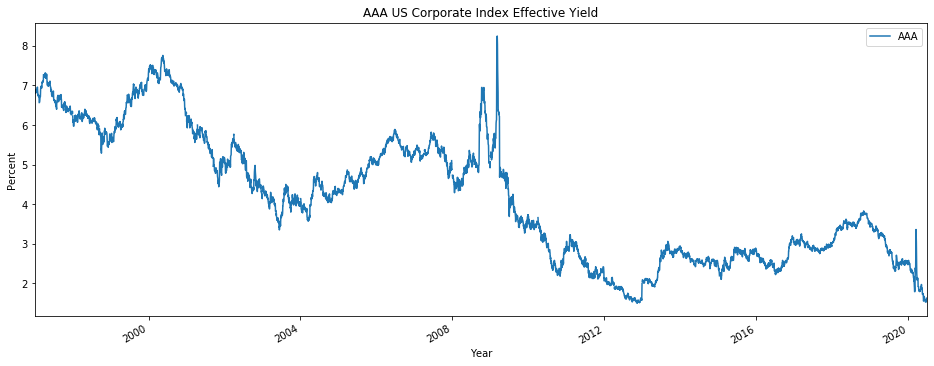

In [35]:
aaa_yield.plot(figsize = (16,6));
plt.xlabel("Year")
plt.ylabel("Percent")
plt.title("AAA US Corporate Index Effective Yield")

### Equity Markets Data
- Will gather data form the S&P 500, Dow, Nasdaq, and Russell 2000 
- Will be best to use the Open data in the attempt to predict the AAA US Corporate Index Effective Yield

In [38]:
tickers = ["^GSPC", "^DJI", "^IXIC",  "^RUT"]

In [39]:
equity_data = pd.DataFrame()

In [40]:
for t in tickers:
    equity_data[t] = web.DataReader(t, data_source="yahoo", start = "2000")["Close"]

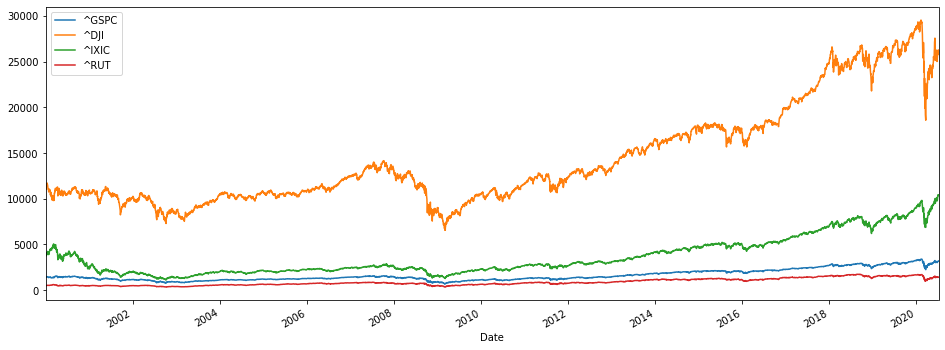

In [43]:
equity_data.plot(figsize = (16,6))

### Combining data sets
- Will combine the data for the AAA US Corporate Index Effective Yield and the equity markets
- will need to adjust the time frames acccordingly

In [47]:
working_data = pd.concat([equity_data, aaa_yield.loc["2000-01-03":]], axis=1)

In [48]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,AAA
2000-01-03,1455.219971,11357.509766,4131.149902,496.420013,7.41
2000-01-04,1399.420044,10997.929688,3901.689941,478.380005,7.34
2000-01-05,1402.109985,11122.650391,3877.540039,478.829987,7.42
2000-01-06,1403.449951,11253.259766,3727.129883,475.339996,7.37
2000-01-07,1441.469971,11522.559570,3882.620117,488.309998,7.35
...,...,...,...,...,...
2020-07-02,3130.010010,25827.359375,10207.629883,1431.859985,1.60
2020-07-03,NaN,NaN,NaN,NaN,1.60
2020-07-06,3179.719971,26287.029297,10433.650391,1442.880005,1.58
2020-07-07,3145.320068,25890.179688,10343.889648,1416.000000,1.55


### Removing  Nan values and checking coorelation
- Will remove the null values and check the coorelation between the data series 

In [50]:
working_data.dropna(inplace= True)

### Correlation Report
- The equity market is inversely correlated to the AAA US Corporate Index Effective Yield 
- More so to the russell 2000

In [52]:
working_data.corr()

,^GSPC,^DJI,^IXIC,^RUT,AAA
^GSPC,1.000000,0.992026,0.984743,0.960358,-0.453887
^DJI,0.992026,1.000000,0.972113,0.971461,-0.502712
^IXIC,0.984743,0.972113,1.000000,0.926777,-0.439385
^RUT,0.960358,0.971461,0.926777,1.000000,-0.576680
AAA,-0.453887,-0.502712,-0.439385,-0.576680,1.000000


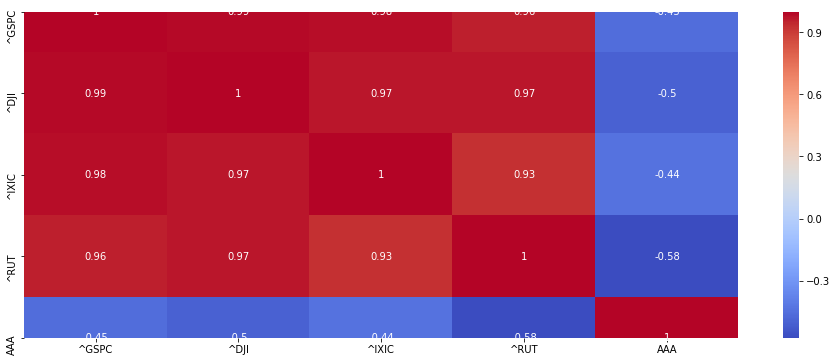

In [54]:
plt.figure(figsize=(16,6))
sns.heatmap(working_data.corr(), annot= True, cmap= "coolwarm");

### Data prepration 
- The theory for this project is that the the equity market should have some predictive capabilities on the the AAA US Corporate Index Effective Yield since they are inversely coorelated. 
- Will test this theory below

In [56]:
X = working_data.drop("AAA", axis=1).values
y = working_data["AAA"].values

### Training Testing and Splitting data

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [61]:
X_test.shape

(2063, 4)

In [62]:
y_test

array([4.49, 4.49, 2.45, ..., 6.93, 2.47, 5.39])

## Scaling the Data 
- Will scale the X values to a normal disribution 

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scalar = MinMaxScaler()

In [68]:
X_train = scalar.fit_transform(X_train)

In [69]:
X_test = scalar.transform(X_test)

### Early Stopping
- will use to prevent overtraining of the model

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=30)

### Creating Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [73]:
model = Sequential()
model.add(Dense(units = 200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dense(units = 1))
model.compile(loss = "mse", optimizer = "adam")

### Fitting the model to data

In [74]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[stop])

Train on 3094 samples, validate on 2063 samples
Epoch 1/300
3094/3094 [==============================] - 5s 1ms/sample - loss: 5.1425 - val_loss: 1.6147
Epoch 2/300
3094/3094 [==============================] - 2s 638us/sample - loss: 1.5040 - val_loss: 1.0836
Epoch 3/300
3094/3094 [==============================] - 2s 647us/sample - loss: 1.2604 - val_loss: 1.0477
Epoch 4/300
3094/3094 [==============================] - 2s 631us/sample - loss: 1.1305 - val_loss: 0.7912
Epoch 5/300
3094/3094 [==============================] - 2s 633us/sample - loss: 1.0155 - val_loss: 0.6850
Epoch 6/300
3094/3094 [==============================] - 2s 622us/sample - loss: 0.8992 - val_loss: 0.7384
Epoch 7/300
3094/3094 [==============================] - 2s 623us/sample - loss: 0.8329 - val_loss: 0.5447
Epoch 8/300
3094/3094 [==============================] - 2s 628us/sample - loss: 0.7010 - val_loss: 0.4170
Epoch 9/300
3094/3094 [==============================] - 2s 630us/sample - loss: 0.6628 - val_loss

3094/3094 [==============================] - 2s 635us/sample - loss: 0.1960 - val_loss: 0.1165
Epoch 77/300
3094/3094 [==============================] - 2s 652us/sample - loss: 0.1942 - val_loss: 0.1206
Epoch 78/300
3094/3094 [==============================] - 2s 629us/sample - loss: 0.2127 - val_loss: 0.1134
Epoch 79/300
3094/3094 [==============================] - 2s 629us/sample - loss: 0.1978 - val_loss: 0.1389
Epoch 80/300
3094/3094 [==============================] - 2s 630us/sample - loss: 0.1887 - val_loss: 0.1277
Epoch 81/300
3094/3094 [==============================] - 2s 641us/sample - loss: 0.1922 - val_loss: 0.1158
Epoch 82/300
3094/3094 [==============================] - 2s 633us/sample - loss: 0.1910 - val_loss: 0.1124
Epoch 83/300
3094/3094 [==============================] - 2s 632us/sample - loss: 0.1673 - val_loss: 0.1142
Epoch 84/300
3094/3094 [==============================] - 2s 621us/sample - loss: 0.1832 - val_loss: 0.1104
Epoch 85/300
3094/3094 [=================

3094/3094 [==============================] - 2s 619us/sample - loss: 0.1687 - val_loss: 0.1096
Epoch 152/300
3094/3094 [==============================] - 2s 623us/sample - loss: 0.1790 - val_loss: 0.1027
Epoch 153/300
3094/3094 [==============================] - 2s 616us/sample - loss: 0.1625 - val_loss: 0.1088
Epoch 154/300
3094/3094 [==============================] - 2s 616us/sample - loss: 0.1735 - val_loss: 0.0928
Epoch 155/300
3094/3094 [==============================] - 2s 617us/sample - loss: 0.1854 - val_loss: 0.1232
Epoch 156/300
3094/3094 [==============================] - 2s 614us/sample - loss: 0.1949 - val_loss: 0.1151
Epoch 157/300
3094/3094 [==============================] - 2s 617us/sample - loss: 0.1654 - val_loss: 0.1056
Epoch 158/300
3094/3094 [==============================] - 2s 617us/sample - loss: 0.1740 - val_loss: 0.1109
Epoch 159/300
3094/3094 [==============================] - 2s 621us/sample - loss: 0.1686 - val_loss: 0.0986
Epoch 160/300
3094/3094 [========

## Model Evaluation

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1000      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  40200     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  20100     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  1

## Training 
- WE can see that the model is training very well with the data provided

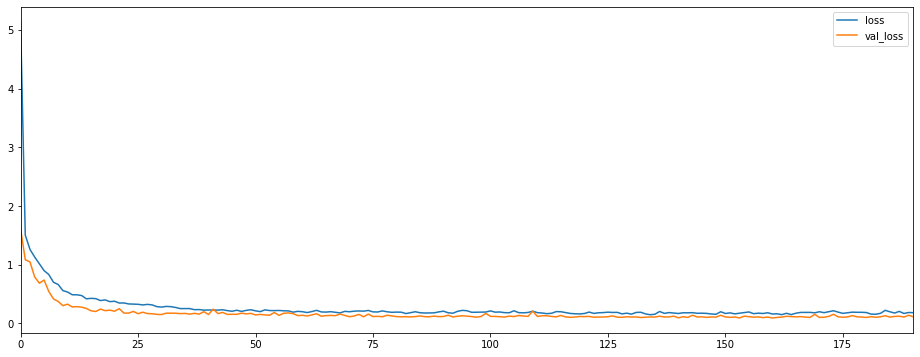

In [83]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Prediction
- Lets check the predicitons of the model
- will check the metrics of the model as well 

In [84]:
predictions = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [86]:
mean_squared_error(y_test, predictions)

0.1120519411316308

In [87]:
mean_absolute_error(y_test, predictions)

0.2509964319923464

### Explained Variance
- Model tells us that the equity markets can explain 94% of the value and behavior of the AAA US Corporate Index Effective Yield 

In [88]:
explained_variance_score(y_test, predictions)

0.9487354534273779

### Testing on random data 
- will remove the AAA yield data to create an environment where the data has not seen our target
- We used the new data with our model to predict the value AAA US Corporate Index Effective Yield

In [173]:
from random import randint
rand_index = randint(1, len(X_train))
new_day = working_data.drop("AAA", axis=1).iloc[rand_index]

## New data
- Our model was trained on scaled data 
- We will need to scale the data to meet the proper input

In [174]:
new_day = scalar.transform(new_day.values.reshape(1,4))

### Model Prediction
- Model predicts the value of AAA US Corporate Index Effective Yield below

In [175]:
model.predict(new_day)

array([[5.1200347]], dtype=float32)

### True Value
- we will grab the index for the random index from our working data to see how the predicitons matches up with the actual value

In [176]:
working_data.iloc[rand_index]["AAA"]

5.16

### Saving our model, and history

In [150]:
#model.save("resources/AAA_Yield.h5")

In [152]:
#pd.DataFrame(model.history.history).to_csv("resources/Model_history.csv")